In [1]:
%pwd

u'/mnt/disk0/home/zhongrunxing/jupyter_code'

In [254]:
import numpy as np
import pandas as pd
import lightgbm as lgb
import matplotlib.pyplot as plt
import seaborn as sns

import os
import gc
import datetime
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.cross_validation import StratifiedKFold
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings("ignore")


# prepare data

In [3]:
path = '/home/zhongrunxing/data/kaggle/give_me/'

In [4]:
train = pd.read_csv(path + 'train.csv')
test = pd.read_csv(path + 'test.csv')

In [5]:
print(train.shape, test.shape)

((150000, 12), (101503, 12))


In [6]:
train.head().T

,0,1,2,3,4
Id,1.000000,2.000000,3.000000,4.00000,5.000000
Probability,1.000000,0.000000,0.000000,0.00000,0.000000
RevolvingUtilizationOfUnsecuredLines,0.766127,0.957151,0.658180,0.23381,0.907239
age,45.000000,40.000000,38.000000,30.00000,49.000000
NumberOfTime30-59DaysPastDueNotWorse,2.000000,0.000000,1.000000,0.00000,1.000000
DebtRatio,0.802982,0.121876,0.085113,0.03605,0.024926
MonthlyIncome,9120.000000,2600.000000,3042.000000,3300.00000,63588.000000
NumberOfOpenCreditLinesAndLoans,13.000000,4.000000,2.000000,5.00000,7.000000
NumberOfTimes90DaysLate,0.000000,0.000000,1.000000,0.00000,0.000000
NumberRealEstateLoansOrLines,6.000000,0.000000,0.000000,0.00000,1.000000


In [7]:
test.head().T

,0,1,2,3,4
Id,1.000000,2.000000,3.000000,4.000000,5.000000
Probability,NaN,NaN,NaN,NaN,NaN
RevolvingUtilizationOfUnsecuredLines,0.885519,0.463295,0.043275,0.280308,1.000000
age,43.000000,57.000000,59.000000,38.000000,27.000000
NumberOfTime30-59DaysPastDueNotWorse,0.000000,0.000000,0.000000,1.000000,0.000000
DebtRatio,0.177513,0.527237,0.687648,0.925961,0.019917
MonthlyIncome,5700.000000,9141.000000,5083.000000,3200.000000,3865.000000
NumberOfOpenCreditLinesAndLoans,4.000000,15.000000,12.000000,7.000000,4.000000
NumberOfTimes90DaysLate,0.000000,0.000000,0.000000,0.000000,0.000000
NumberRealEstateLoansOrLines,0.000000,4.000000,1.000000,2.000000,0.000000


In [8]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,150000.0,75000.500000,43301.414527,1.0,37500.750000,75000.500000,112500.250000,150000.0
Probability,150000.0,0.066840,0.249746,0.0,0.000000,0.000000,0.000000,1.0
RevolvingUtilizationOfUnsecuredLines,150000.0,6.048438,249.755371,0.0,0.029867,0.154181,0.559046,50708.0
age,150000.0,52.295207,14.771866,0.0,41.000000,52.000000,63.000000,109.0
NumberOfTime30-59DaysPastDueNotWorse,150000.0,0.421033,4.192781,0.0,0.000000,0.000000,0.000000,98.0
DebtRatio,150000.0,353.005076,2037.818523,0.0,0.175074,0.366508,0.868254,329664.0
MonthlyIncome,120269.0,6670.221237,14384.674215,0.0,3400.000000,5400.000000,8249.000000,3008750.0
NumberOfOpenCreditLinesAndLoans,150000.0,8.452760,5.145951,0.0,5.000000,8.000000,11.000000,58.0
NumberOfTimes90DaysLate,150000.0,0.265973,4.169304,0.0,0.000000,0.000000,0.000000,98.0
NumberRealEstateLoansOrLines,150000.0,1.018240,1.129771,0.0,0.000000,1.000000,2.000000,54.0


In [9]:
train.dtypes

Id                                        int64
Probability                               int64
RevolvingUtilizationOfUnsecuredLines    float64
age                                       int64
NumberOfTime30-59DaysPastDueNotWorse      int64
DebtRatio                               float64
MonthlyIncome                           float64
NumberOfOpenCreditLinesAndLoans           int64
NumberOfTimes90DaysLate                   int64
NumberRealEstateLoansOrLines              int64
NumberOfTime60-89DaysPastDueNotWorse      int64
NumberOfDependents                      float64
dtype: object

In [10]:
col_id = 'Id'
col_label = 'Probability'
col_fea = [col for col in train.columns if col not in [col_id, col_label]]

In [11]:
train.shape, test.shape

((150000, 12), (101503, 12))

In [12]:
'{:,.0f} Bytes'.format(train.memory_usage(deep=True).sum())

'14,400,072 Bytes'

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
Id                                      150000 non-null int64
Probability                             150000 non-null int64
RevolvingUtilizationOfUnsecuredLines    150000 non-null float64
age                                     150000 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    150000 non-null int64
DebtRatio                               150000 non-null float64
MonthlyIncome                           120269 non-null float64
NumberOfOpenCreditLinesAndLoans         150000 non-null int64
NumberOfTimes90DaysLate                 150000 non-null int64
NumberRealEstateLoansOrLines            150000 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    150000 non-null int64
NumberOfDependents                      146076 non-null float64
dtypes: float64(4), int64(8)
memory usage: 13.7 MB


# <font color = 'red'> simple baseline </font>

In [20]:
## defaut params, bagging whole valid auc = 0.8657359323472548
meta_train, meta_test = cv_lgb(train[col_fea], test[col_fea], train[col_label], 1, 5)


################################################## seed = 0
cur time = 2018/11/20 16:55:22
========================= seed = 0
current whole valid auc = 0.8657359323472548
bagging whole valid auc = 0.8657359323472548
('best_iteration', [261, 145, 137, 237, 217], 199.4)
('train', array([0.89780202, 0.88374393, 0.88373328, 0.89444568, 0.89145291]), 0.8902355625568568)
('valid', array([0.8644881 , 0.86830905, 0.86391065, 0.86459549, 0.8679837 ]), 0.8658573978087439)

##############################################
### CV avergae result ###
cur time = 2018/11/20 16:55:39
train auc = 0.8902355625568568
valid auc = 0.8658573978087439
##############################################
bagging whole valid auc = 0.8657359323472548


# remove outlier

In [30]:
train.columns

Index([u'Id', u'Probability', u'RevolvingUtilizationOfUnsecuredLines', u'age',
       u'NumberOfTime30-59DaysPastDueNotWorse', u'DebtRatio', u'MonthlyIncome',
       u'NumberOfOpenCreditLinesAndLoans', u'NumberOfTimes90DaysLate',
       u'NumberRealEstateLoansOrLines',
       u'NumberOfTime60-89DaysPastDueNotWorse', u'NumberOfDependents'],
      dtype='object')

In [31]:
#异常值过滤
df_x = train.copy()
df_x['age'][df_x["DebtRatio"]>1] = 1

df_x_test = test.copy()
df_x_test['age'][df_x_test["DebtRatio"]>1] = 1


# df_x[df_x["age"]<=0] = df_x["age"].mean()
# df_x[df_x["NumberOfTime30-59DaysPastDueNotWorse"]>80] = 80  
# df_x[df_x["NumberRealEstateLoansOrLines"]>50] = 50

In [32]:
# ##############################################
# ### CV avergae result ###
# cur time = 2018/11/13 19:59:26
# train auc = 0.8777210819505399
# valid auc = 0.8667551354583244
# ##############################################
# bagging whole valid auc = 0.8667054104325682

meta_train, meta_test = cv_lgb(df_x[col_fea], df_x_test[col_fea], df_x[col_label], 1, 5)


################################################## seed = 0
cur time = 2018/11/20 14:37:14
========================= seed = 0
current whole valid auc = 0.8643725379553904
bagging whole valid auc = 0.8643725379553904
('best_iteration', [205, 187, 207, 171, 142], 182.4)
('train', array([0.89059954, 0.88765012, 0.89058097, 0.88627578, 0.88182945]), 0.8873871738933412)
('valid', array([0.86367513, 0.86710592, 0.86242083, 0.86273999, 0.86658889]), 0.8645061499687905)

##############################################
### CV avergae result ###
cur time = 2018/11/20 14:37:30
train auc = 0.8873871738933412
valid auc = 0.8645061499687905
##############################################
bagging whole valid auc = 0.8643725379553904


In [436]:
(test['DebtRatio'] > 1).sum(), test.shape

(23578, (101503, 12))

In [437]:
result = pd.DataFrame({col_id:test[col_id], col_label:meta_test})[[col_id, col_label]]
result.to_csv(path + '/result/baseline_lgb_clip_age.csv', index = False)

# EDA

In [30]:
train[col_label].value_counts()

0    139974
1     10026
Name: Probability, dtype: int64

In [35]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,150000.0,75000.500000,43301.414527,1.0,37500.750000,75000.500000,112500.250000,150000.0
Probability,150000.0,0.066840,0.249746,0.0,0.000000,0.000000,0.000000,1.0
RevolvingUtilizationOfUnsecuredLines,150000.0,6.048438,249.755371,0.0,0.029867,0.154181,0.559046,50708.0
age,150000.0,52.295207,14.771866,0.0,41.000000,52.000000,63.000000,109.0
NumberOfTime30-59DaysPastDueNotWorse,150000.0,0.421033,4.192781,0.0,0.000000,0.000000,0.000000,98.0
DebtRatio,150000.0,353.005076,2037.818523,0.0,0.175074,0.366508,0.868254,329664.0
MonthlyIncome,120269.0,6670.221237,14384.674215,0.0,3400.000000,5400.000000,8249.000000,3008750.0
NumberOfOpenCreditLinesAndLoans,150000.0,8.452760,5.145951,0.0,5.000000,8.000000,11.000000,58.0
NumberOfTimes90DaysLate,150000.0,0.265973,4.169304,0.0,0.000000,0.000000,0.000000,98.0
NumberRealEstateLoansOrLines,150000.0,1.018240,1.129771,0.0,0.000000,1.000000,2.000000,54.0


In [36]:
train.columns

Index([u'Id', u'Probability', u'RevolvingUtilizationOfUnsecuredLines', u'age',
       u'NumberOfTime30-59DaysPastDueNotWorse', u'DebtRatio', u'MonthlyIncome',
       u'NumberOfOpenCreditLinesAndLoans', u'NumberOfTimes90DaysLate',
       u'NumberRealEstateLoansOrLines',
       u'NumberOfTime60-89DaysPastDueNotWorse', u'NumberOfDependents'],
      dtype='object')

In [24]:
# https://cloud.tencent.com/developer/article/1092198
# #数据指标解读
# ID——用户编号
# SeriousDlqin2yrs——好坏客户区分，这里以逾期90天为界，超过90天表示“坏客户”，用1表示是；未超过90天表示“好客户”，用0表示
# RevolvingUtilizationOfUnsecuredLines——贷款以及信用卡可以用额度与总额度比值
# age——借款人的年龄
# NumberOfTime30-59DaysPastDueNotWorse——借款人逾期30-59天但过去两年不是坏账的次数（笔数）
# DebtRatio——负债率，每月要支付的债务、赡养费、生活费占每月总收入的比值
# MonthlyIncome——月收入
# NumberOfOpenCreditLinesAndLoans——贷款和信用卡数量
# NumberOfTimes90DaysLate——逾期90天的次数
# NumberRealEstateLoansOrLines——固定资产贷款数量
# NumberOfTime60-89DaysPastDueNotWorse——逾期60-89天次数
# NumberOfDependents——家属数量

In [41]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
Id                                      150000 non-null int64
Probability                             150000 non-null int64
RevolvingUtilizationOfUnsecuredLines    150000 non-null float64
age                                     150000 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    150000 non-null int64
DebtRatio                               150000 non-null float64
MonthlyIncome                           120269 non-null float64
NumberOfOpenCreditLinesAndLoans         150000 non-null int64
NumberOfTimes90DaysLate                 150000 non-null int64
NumberRealEstateLoansOrLines            150000 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    150000 non-null int64
NumberOfDependents                      146076 non-null float64
dtypes: float64(4), int64(8)
memory usage: 13.7 MB


In [48]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,150000.0,75000.500000,43301.414527,1.0,37500.750000,75000.500000,112500.250000,150000.0
Probability,150000.0,0.066840,0.249746,0.0,0.000000,0.000000,0.000000,1.0
RevolvingUtilizationOfUnsecuredLines,150000.0,6.048438,249.755371,0.0,0.029867,0.154181,0.559046,50708.0
age,150000.0,52.295207,14.771866,0.0,41.000000,52.000000,63.000000,109.0
NumberOfTime30-59DaysPastDueNotWorse,150000.0,0.421033,4.192781,0.0,0.000000,0.000000,0.000000,98.0
DebtRatio,150000.0,353.005076,2037.818523,0.0,0.175074,0.366508,0.868254,329664.0
MonthlyIncome,120269.0,6670.221237,14384.674215,0.0,3400.000000,5400.000000,8249.000000,3008750.0
NumberOfOpenCreditLinesAndLoans,150000.0,8.452760,5.145951,0.0,5.000000,8.000000,11.000000,58.0
NumberOfTimes90DaysLate,150000.0,0.265973,4.169304,0.0,0.000000,0.000000,0.000000,98.0
NumberRealEstateLoansOrLines,150000.0,1.018240,1.129771,0.0,0.000000,1.000000,2.000000,54.0


In [49]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,101503.0,50752.000000,29301.536524,1.0,25376.500000,50752.000000,76127.500000,101503.0
Probability,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RevolvingUtilizationOfUnsecuredLines,101503.0,5.310000,196.156039,0.0,0.030131,0.152586,0.564225,21821.0
age,101503.0,52.405436,14.779756,21.0,41.000000,52.000000,63.000000,104.0
NumberOfTime30-59DaysPastDueNotWorse,101503.0,0.453770,4.538487,0.0,0.000000,0.000000,0.000000,98.0
DebtRatio,101503.0,344.475020,1632.595231,0.0,0.173423,0.364260,0.851619,268326.0
MonthlyIncome,81400.0,6855.035590,36508.600375,0.0,3408.000000,5400.000000,8200.000000,7727000.0
NumberOfOpenCreditLinesAndLoans,101503.0,8.453514,5.144100,0.0,5.000000,8.000000,11.000000,85.0
NumberOfTimes90DaysLate,101503.0,0.296691,4.515859,0.0,0.000000,0.000000,0.000000,98.0
NumberRealEstateLoansOrLines,101503.0,1.013074,1.110253,0.0,0.000000,1.000000,2.000000,37.0


# feature importance (lgb)

In [228]:
def simple_lgb(X, y):
    print('######################################################## begin')
    print('####### cur time = ' + str(datetime.datetime.now().strftime("%Y/%m/%d %H:%M:%S")))
    
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=1)
    train_data = lgb.Dataset(X_train, label=y_train)
    valid_data = lgb.Dataset(X_val, label=y_val)
    
    params = {
        'task':'train', 
        'objective': 'binary',
        'metric': 'auc', 

        'boosting_type':'gbdt',
        'num_leaves': 31,
        'learning_rate': 0.05,
        'feature_fraction': 0.85,
        'subsample':0.85,
        'num_threads': 15,
        'seed': 1,
        'max_bin':127,
        'is_unbalance': True # useful
        #'reg_alpha': 0.1,
        #'reg_lambda': 0.1
    }   
    model = lgb.train(params, train_data, 3000, [train_data, valid_data],
                          early_stopping_rounds=100, verbose_eval=-1)
    print('########################################################## end')
    print('####### cur time = ' + str(datetime.datetime.now().strftime("%Y/%m/%d %H:%M:%S")))
    return model

In [274]:
model_lgb = simple_lgb(train[col_fea], train[col_label])

######################################################## begin
####### cur time = 2018/11/21 11:51:17
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[146]	training's auc: 0.888462	valid_1's auc: 0.865975
########################################################## end
####### cur time = 2018/11/21 11:51:20


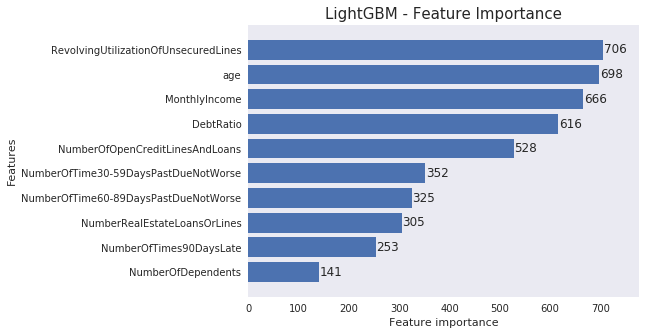

In [23]:
fig, ax = plt.subplots(figsize=(7,5))
lgb.plot_importance(model_lgb, max_num_features=50, height=0.8, ax=ax)
ax.grid(False)
plt.title("LightGBM - Feature Importance", fontsize=15)
plt.show()

# feature importance (rf)

In [238]:
from sklearn.ensemble import RandomForestClassifier

def simple_rf(X, y):
    print('######################################################## begin')
    print('####### cur time = ' + str(datetime.datetime.now().strftime("%Y/%m/%d %H:%M:%S")))
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=1)
    
    model = RandomForestClassifier()
    params = {
        'bootstrap': True,
        'criterion': 'gini',
        'max_depth': 12,
        'max_features': 'auto',
        'max_leaf_nodes': None,
        'min_impurity_decrease': 0.0,
        'min_impurity_split': None,
        'min_samples_leaf': 10,
        'min_samples_split': 2,
        'min_weight_fraction_leaf': 0.0,
        'n_estimators': 1000,
        #'n_jobs': -1,
        'n_jobs': 15,
        'oob_score': False,
        'random_state': 42,
        'verbose': 0,
        'warm_start': False,
        'class_weight':{0:13, 1:1}
    }
    model.set_params(**params)
    model.fit(X_train, y_train)
    
    auc_train = roc_auc_score(y_train, model.predict_proba(X_train)[:,1])
    auc_valid = roc_auc_score(y_valid, model.predict_proba(X_valid)[:,1])
    print(auc_train, auc_valid)
    print('auc_train = {}, auc_valid = {}'.format(auc_train, auc_valid))
    print('########################################################## end')
    print('####### cur time = ' + str(datetime.datetime.now().strftime("%Y/%m/%d %H:%M:%S")))
    return model

In [227]:
train2 = train.copy()
train2.fillna(train2.mean(), inplace= True)
model_rf = simple_rf(train2[col_fea], train2[col_label])

######################################################## begin
####### cur time = 2018/11/21 11:15:33
(0.9025343956756243, 0.8657046807499564)
auc_train = 0.902534395676, auc_valid = 0.86570468075
########################################################## end
####### cur time = 2018/11/21 11:15:50


In [240]:
train2 = train.copy()
train2.fillna(train2.mean(), inplace= True)
model_rf = simple_rf(train2[col_fea], train2[col_label])

######################################################## begin
####### cur time = 2018/11/21 11:29:34
(0.8989151497034167, 0.8659711091823894)
auc_train = 0.898915149703, auc_valid = 0.865971109182
########################################################## end
####### cur time = 2018/11/21 11:29:50


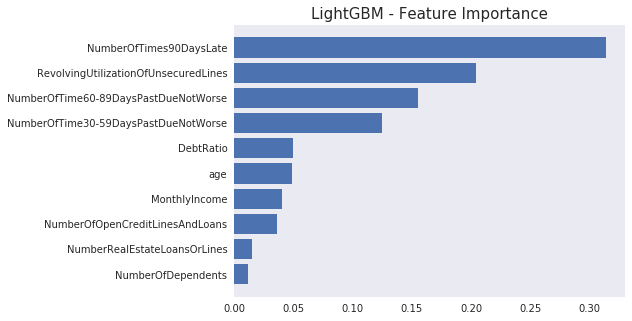

In [93]:
fig, ax = plt.subplots(figsize=(7,5))

rf_fea_imp = pd.DataFrame({'fea':col_fea, 'imp':model_rf.feature_importances_})
rf_fea_imp.sort_values(by = 'imp', inplace = True, ascending = True)
plt.barh(rf_fea_imp['fea'], rf_fea_imp['imp'])

ax.grid(False)
plt.title("LightGBM - Feature Importance", fontsize=15)
plt.show()

# feature importance (erf)

In [138]:
from sklearn.ensemble import ExtraTreesClassifier

def simple_erf(X, y):
    print('######################################################## begin')
    print('####### cur time = ' + str(datetime.datetime.now().strftime("%Y/%m/%d %H:%M:%S")))
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=1)
    
    model = ExtraTreesClassifier()
    params = {
        'n_estimators':1000,
        'max_depth':12,
        'min_samples_split':2,
        'random_state':1,
        'n_jobs': 15
    }
    
    
    model.set_params(**params)
    model.fit(X_train, y_train)
    
    auc_train = roc_auc_score(y_train, model.predict_proba(X_train)[:,1])
    auc_valid = roc_auc_score(y_valid, model.predict_proba(X_valid)[:,1])
    print(auc_train, auc_valid)
    print('auc_train = {}, auc_valid = {}'.format(auc_train, auc_valid))
    print('########################################################## end')
    print('####### cur time = ' + str(datetime.datetime.now().strftime("%Y/%m/%d %H:%M:%S")))
    return model

In [139]:
train2 = train.copy()
train2.fillna(train2.mean(), inplace= True)
model_erf = simple_erf(train2[col_fea], train2[col_label])

######################################################## begin
####### cur time = 2018/11/20 19:28:12
(0.8367278853861279, 0.830408291721419)
auc_train = 0.836727885386, auc_valid = 0.830408291721
########################################################## end
####### cur time = 2018/11/20 19:28:21


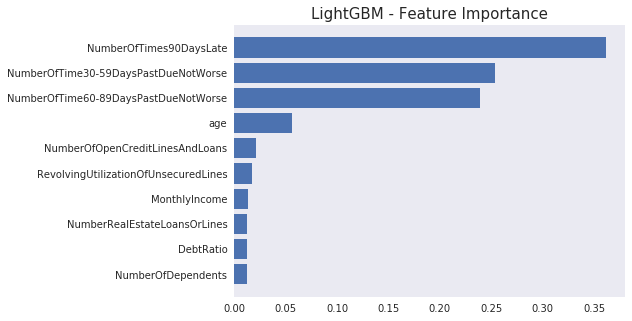

In [140]:
fig, ax = plt.subplots(figsize=(7,5))

rf_fea_imp = pd.DataFrame({'fea':col_fea, 'imp':model_erf.feature_importances_})
rf_fea_imp.sort_values(by = 'imp', inplace = True, ascending = True)
plt.barh(rf_fea_imp['fea'], rf_fea_imp['imp'])

ax.grid(False)
plt.title("LightGBM - Feature Importance", fontsize=15)
plt.show()

In [245]:
# https://cloud.tencent.com/developer/article/1092198
# #数据指标解读
# ID——用户编号
# SeriousDlqin2yrs——好坏客户区分，这里以逾期90天为界，超过90天表示“坏客户”，用1表示是；未超过90天表示“好客户”，用0表示
# RevolvingUtilizationOfUnsecuredLines——贷款以及信用卡可以用额度与总额度比值
# age——借款人的年龄
# NumberOfTime30-59DaysPastDueNotWorse——借款人逾期30-59天但过去两年不是坏账的次数（笔数）
# DebtRatio——负债率，每月要支付的债务、赡养费、生活费占每月总收入的比值
# MonthlyIncome——月收入
# NumberOfOpenCreditLinesAndLoans——贷款和信用卡数量
# NumberOfTimes90DaysLate——逾期90天的次数
# NumberRealEstateLoansOrLines——固定资产贷款数量
# NumberOfTime60-89DaysPastDueNotWorse——逾期60-89天次数
# NumberOfDependents——家属数量

In [246]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,150000.0,75000.500000,43301.414527,1.0,37500.750000,75000.500000,112500.250000,150000.0
Probability,150000.0,0.066840,0.249746,0.0,0.000000,0.000000,0.000000,1.0
RevolvingUtilizationOfUnsecuredLines,150000.0,6.048438,249.755371,0.0,0.029867,0.154181,0.559046,50708.0
age,150000.0,52.295207,14.771866,0.0,41.000000,52.000000,63.000000,109.0
NumberOfTime30-59DaysPastDueNotWorse,150000.0,0.421033,4.192781,0.0,0.000000,0.000000,0.000000,98.0
DebtRatio,150000.0,353.005076,2037.818523,0.0,0.175074,0.366508,0.868254,329664.0
MonthlyIncome,120269.0,6670.221237,14384.674215,0.0,3400.000000,5400.000000,8249.000000,3008750.0
NumberOfOpenCreditLinesAndLoans,150000.0,8.452760,5.145951,0.0,5.000000,8.000000,11.000000,58.0
NumberOfTimes90DaysLate,150000.0,0.265973,4.169304,0.0,0.000000,0.000000,0.000000,98.0
NumberRealEstateLoansOrLines,150000.0,1.018240,1.129771,0.0,0.000000,1.000000,2.000000,54.0


In [275]:
model_lgb = simple_lgb(train[col_fea], train[col_label])

######################################################## begin
####### cur time = 2018/11/21 11:51:40
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[146]	training's auc: 0.888462	valid_1's auc: 0.865975
########################################################## end
####### cur time = 2018/11/21 11:51:43


In [276]:
model_lgb = simple_lgb(pd.concat([train_fea, train[col_fea]], axis = 1),
                       train[col_label])

######################################################## begin
####### cur time = 2018/11/21 11:52:21
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[164]	training's auc: 0.890376	valid_1's auc: 0.8655
########################################################## end
####### cur time = 2018/11/21 11:52:24


# Feature 

In [795]:
train_fea = pd.DataFrame([])
test_fea = pd.DataFrame([])

X = train[col_fea].copy()
X_test = test.copy()

In [831]:
X2 = X.copy()
X = test[col_fea].copy()

In [638]:
meta_train, meta_test = cv_lgb(X, X[:10], train[col_label], 1, 5)


################################################## seed = 0
cur time = 2018/11/21 16:06:34
========================= seed = 0
current whole valid auc = 0.8657359323472548
bagging whole valid auc = 0.8657359323472548
('best_iteration', [261, 145, 137, 237, 217], 199.4)
('train', array([0.89780202, 0.88374393, 0.88373328, 0.89444568, 0.89145291]), 0.8902355625568568)
('valid', array([0.8644881 , 0.86830905, 0.86391065, 0.86459549, 0.8679837 ]), 0.8658573978087439)

##############################################
### CV avergae result ###
cur time = 2018/11/21 16:06:49
train auc = 0.8902355625568568
valid auc = 0.8658573978087439
##############################################
bagging whole valid auc = 0.8657359323472548


In [832]:
X['UnknownNumberOfDependents'] = X['NumberOfDependents'].apply(lambda x: 1 if np.isnan(x) else 0)
X['MonthlyIncome_isnan'] = X['MonthlyIncome'].apply(lambda x: 1 if np.isnan(x) else 0)

In [833]:
X['no_dependents'] = X['NumberOfDependents'].apply(lambda x: 1 if x == 0 else 0)
X['NumberOfDependents'] = X['NumberOfDependents'].apply(lambda x: 0 if np.isnan(x) else x)

In [834]:
X['no_income'] = X['MonthlyIncome'].apply(lambda x: 1 if x == 0 else 0)
X['MonthlyIncome'] = X['MonthlyIncome'].apply(lambda x: 0 if np.isnan(x) else x)

In [835]:
X['DebtRatio_is0'] = X['DebtRatio'].apply(lambda x: 1 if x == 0 else 0)
X['UnknownIncomeDebtRatio'] = X['DebtRatio']
X['UnknownIncomeDebtRatio'][X['MonthlyIncome_isnan'] == 0] = 0
X['DebtRatio'][X['MonthlyIncome_isnan'] == 1] = 0 ##

In [794]:
meta_train, meta_test = cv_lgb(X, X[:10], train[col_label], 1, 5)


################################################## seed = 0
cur time = 2018/11/21 16:30:17
========================= seed = 0
current whole valid auc = 0.865843071591384
bagging whole valid auc = 0.865843071591384
('best_iteration', [186, 182, 168, 365, 187], 217.6)
('train', array([0.88927428, 0.88722106, 0.88656188, 0.90551799, 0.88809631]), 0.8913343044446336)
('valid', array([0.86433264, 0.86860471, 0.86403286, 0.86522451, 0.86753894]), 0.8659467313972543)

##############################################
### CV avergae result ###
cur time = 2018/11/21 16:30:33
train auc = 0.8913343044446336
valid auc = 0.8659467313972543
##############################################
bagging whole valid auc = 0.865843071591384


In [836]:
X['utilization_outlier'] = X['RevolvingUtilizationOfUnsecuredLines']
X['utilization_outlier'][np.log(X['utilization_outlier']) <= 3] = 0
X['utilization_is0'] = X['RevolvingUtilizationOfUnsecuredLines'].apply(lambda x: 1 if x == 0 else 0)
X['RevolvingUtilizationOfUnsecuredLines'][np.log(X['RevolvingUtilizationOfUnsecuredLines']) > 3] = 0

In [837]:
X['Log.Debt'] = np.log((X['MonthlyIncome'] + 1) * X['DebtRatio'])
X['Log.Debt'] = X['Log.Debt'].apply(lambda x: 0 if np.isinf(x) else x)

In [838]:
X['RevolvingLines'] = X['NumberOfOpenCreditLinesAndLoans'] - X['NumberRealEstateLoansOrLines']

In [839]:
#X['no_income'] = X['MonthlyIncome'].apply(lambda x: 1 if x == 0 else 0)

X['has_RevolvingLines'] = X['RevolvingLines'].apply(lambda x: 1 if x > 0 else 0)
X['has_RealEstateLoans'] = X['NumberRealEstateLoansOrLines'].apply(lambda x: 1 if x > 0 else 0)
X['has_RealEstateLoans_3'] = X['NumberRealEstateLoansOrLines'].apply(lambda x: 1 if x >= 3 else 0)

X['age_60'] = X['age'].apply(lambda x: 1 if x >= 60 else 0)
X['DebtRatio_33'] = ((X['no_income'] == 0) & (X['DebtRatio'] > 0.33)).astype(int)
X['DebtRatio_43'] = ((X['no_income'] == 0) & (X['DebtRatio'] > 0.43)).astype(int)

X['rest_income'] = (1 - X['DebtRatio']) * X['MonthlyIncome']
X['rest_income'][X['no_income'] == 1] = 0

In [840]:
X['RevolvingToRealEstate'] = X['RevolvingLines'] / (1 + X['NumberRealEstateLoansOrLines'])

In [702]:
meta_train, meta_test = cv_lgb(X, X[:10], train[col_label], 1, 5)


################################################## seed = 0
cur time = 2018/11/21 16:15:36
========================= seed = 0
current whole valid auc = 0.8661050969709171
bagging whole valid auc = 0.8661050969709171
('best_iteration', [179, 155, 156, 218, 156], 172.8)
('train', array([0.8908964 , 0.88658225, 0.8881184 , 0.89600986, 0.88693653]), 0.8897086892836088)
('valid', array([0.86474498, 0.86867603, 0.86448358, 0.86548746, 0.86764066]), 0.866206541456263)

##############################################
### CV avergae result ###
cur time = 2018/11/21 16:15:59
train auc = 0.8897086892836088
valid auc = 0.866206541456263
##############################################
bagging whole valid auc = 0.8661050969709171


# not good

In [841]:
X['NumberOfTime30-59DaysPastDueNotWorseLarge'] = (X['NumberOfTime30-59DaysPastDueNotWorse'] > 90).astype(int)
X['NumberOfTime30-59DaysPastDueNotWorse96'] = (X['NumberOfTime30-59DaysPastDueNotWorse'] == 96).astype(int)
X['NumberOfTime30-59DaysPastDueNotWorse98'] = (X['NumberOfTime30-59DaysPastDueNotWorse'] == 98).astype(int)
X['Never30-59DaysPastDueNotWorse'] = (X['NumberOfTime30-59DaysPastDueNotWorse'] == 0).astype(int)
X['NumberOfTime30-59DaysPastDueNotWorse'][X['NumberOfTime30-59DaysPastDueNotWorse'] > 90] = 0

In [842]:
X['NumberOfTime60-89DaysPastDueNotWorseLarge'] = (X['NumberOfTime60-89DaysPastDueNotWorse'] > 90).astype(int)
X['NumberOfTime60-89DaysPastDueNotWorse96'] = (X['NumberOfTime60-89DaysPastDueNotWorse'] == 96).astype(int)
X['NumberOfTime60-89DaysPastDueNotWorse98'] = (X['NumberOfTime60-89DaysPastDueNotWorse'] == 98).astype(int)
X['Never60-89DaysPastDueNotWorse'] = (X['NumberOfTime60-89DaysPastDueNotWorse'] == 0).astype(int)
X['NumberOfTime60-89DaysPastDueNotWorse'][X['NumberOfTime60-89DaysPastDueNotWorse'] > 90] = 0

In [843]:
X['NumberOfTimes90DaysLateLarge'] = (X['NumberOfTimes90DaysLate'] > 90).astype(int)
X['NumberOfTimes90DaysLate96'] = (X['NumberOfTimes90DaysLate'] == 96).astype(int)
X['NumberOfTimes90DaysLate98'] = (X['NumberOfTimes90DaysLate'] == 98).astype(int)
X['Never90DaysLate'] = (X['NumberOfTimes90DaysLate'] == 0).astype(int)
X['NumberOfTimes90DaysLate'][X['NumberOfTimes90DaysLate'] > 90] = 0

In [655]:
meta_train, meta_test = cv_lgb(X, X[:10], train[col_label], 1, 5)


################################################## seed = 0
cur time = 2018/11/21 16:10:01
========================= seed = 0
current whole valid auc = 0.8657827760614777
bagging whole valid auc = 0.8657827760614777
('best_iteration', [183, 224, 227, 179, 154], 193.4)
('train', array([0.89116015, 0.89438744, 0.8957965 , 0.89094642, 0.88610006]), 0.8916781117151664)
('valid', array([0.86432455, 0.86779695, 0.86431092, 0.86523792, 0.86772583]), 0.8658792348458786)

##############################################
### CV avergae result ###
cur time = 2018/11/21 16:10:20
train auc = 0.8916781117151664
valid auc = 0.8658792348458786
##############################################
bagging whole valid auc = 0.8657827760614777


In [844]:
X['IncomeDivBy10'] = (X['MonthlyIncome'] % 10 == 0).astype(int)
X['IncomeDivBy100'] = (X['MonthlyIncome'] % 100 == 0).astype(int)
X['IncomeDivBy1000'] = (X['MonthlyIncome'] % 1000 == 0).astype(int)
X['IncomeDivBy5000'] = (X['MonthlyIncome'] % 5000 == 0).astype(int)
X['Weird0999Utilization'] = (X['RevolvingUtilizationOfUnsecuredLines'] == 0.9999999).astype(int)
X['FullUtilization'] = (X['RevolvingUtilizationOfUnsecuredLines'] == 1).astype(int)
X['ExcessUtilization'] = (X['RevolvingUtilizationOfUnsecuredLines'] > 1).astype(int)

In [704]:
meta_train, meta_test = cv_lgb(X, X[:10], train[col_label], 1, 5)


################################################## seed = 0
cur time = 2018/11/21 16:16:21
========================= seed = 0
current whole valid auc = 0.8661455731978561
bagging whole valid auc = 0.8661455731978561
('best_iteration', [181, 175, 209, 175, 199], 187.8)
('train', array([0.89240852, 0.88949669, 0.89599275, 0.89125244, 0.89371133]), 0.8925723445702237)
('valid', array([0.865036  , 0.86882063, 0.86477604, 0.86478401, 0.86769717]), 0.8662227697406479)

##############################################
### CV avergae result ###
cur time = 2018/11/21 16:16:41
train auc = 0.8925723445702237
valid auc = 0.8662227697406479
##############################################
bagging whole valid auc = 0.8661455731978561


In [845]:
X['NumberOfTime30-89DaysPastDueNotWorse'] = X['NumberOfTime30-59DaysPastDueNotWorse'] + X['NumberOfTime60-89DaysPastDueNotWorse']
X['Never30-89DaysPastDueNotWorse'] = X['Never60-89DaysPastDueNotWorse'] * X['Never30-59DaysPastDueNotWorse']

In [846]:
X['NumberOfTimesPastDue'] = X['NumberOfTime30-59DaysPastDueNotWorse'] + X['NumberOfTime60-89DaysPastDueNotWorse'] + X['NumberOfTimes90DaysLate']
X['NeverPastDue'] = X['Never90DaysLate'] * X['Never60-89DaysPastDueNotWorse'] * X['Never30-59DaysPastDueNotWorse']
X['Log.RevolvingUtilizationTimesLines'] = np.log1p(X['RevolvingLines'] * X['RevolvingUtilizationOfUnsecuredLines'])

In [847]:
X['Log.RevolvingUtilizationOfUnsecuredLines'] = np.log(X['RevolvingUtilizationOfUnsecuredLines'])
X['Log.RevolvingUtilizationOfUnsecuredLines'][np.isnan(X['Log.RevolvingUtilizationOfUnsecuredLines'])] = 0
X['Log.RevolvingUtilizationOfUnsecuredLines'][np.isinf(X['Log.RevolvingUtilizationOfUnsecuredLines'])] = 0
# X['RevolvingUtilizationOfUnsecuredLines'] = NULL
#X.drop(['RevolvingUtilizationOfUnsecuredLines'], axis = 1, inplace = True)

In [708]:
meta_train, meta_test = cv_lgb(X, X[:10], train[col_label], 1, 5)


################################################## seed = 0
cur time = 2018/11/21 16:17:13
========================= seed = 0
current whole valid auc = 0.866079786992786
bagging whole valid auc = 0.866079786992786
('best_iteration', [146, 157, 181, 187, 125], 159.2)
('train', array([0.88732824, 0.88853699, 0.89154087, 0.89348326, 0.8822777 ]), 0.8886334119325433)
('valid', array([0.8649949 , 0.86859301, 0.86501923, 0.8653166 , 0.8673114 ]), 0.8662470255053378)

##############################################
### CV avergae result ###
cur time = 2018/11/21 16:17:42
train auc = 0.8886334119325433
valid auc = 0.8662470255053378
##############################################
bagging whole valid auc = 0.866079786992786


# not good

In [848]:
X['DelinquenciesPerLine'] = X['NumberOfTimesPastDue'] / X['NumberOfOpenCreditLinesAndLoans']
X['DelinquenciesPerLine'][X['NumberOfOpenCreditLinesAndLoans'] == 0] = 0
X['MajorDelinquenciesPerLine'] = X['NumberOfTimes90DaysLate'] / X['NumberOfOpenCreditLinesAndLoans']
X['MajorDelinquenciesPerLine'][X['NumberOfOpenCreditLinesAndLoans'] == 0] = 0
X['MinorDelinquenciesPerLine'] = X['NumberOfTime30-89DaysPastDueNotWorse'] / X['NumberOfOpenCreditLinesAndLoans']
X['MinorDelinquenciesPerLine'][X['NumberOfOpenCreditLinesAndLoans'] == 0] = 0

In [849]:
# Now delinquencies per revolving
X['DelinquenciesPerRevolvingLine'] = X['NumberOfTimesPastDue'] / X['RevolvingLines']
X['DelinquenciesPerRevolvingLine'][X['RevolvingLines'] == 0] = 0
X['MajorDelinquenciesPerRevolvingLine'] = X['NumberOfTimes90DaysLate'] / X['RevolvingLines']
X['MajorDelinquenciesPerRevolvingLine'][X['RevolvingLines'] == 0] = 0
X['MinorDelinquenciesPerRevolvingLine'] = X['NumberOfTime30-89DaysPastDueNotWorse'] / X['RevolvingLines']
X['MinorDelinquenciesPerRevolvingLine'][X['RevolvingLines'] == 0] = 0

In [850]:
X['Log.DebtPerLine'] = X['Log.Debt'] - np.log1p(X['NumberOfOpenCreditLinesAndLoans'])
X['Log.DebtPerRealEstateLine'] = X['Log.Debt'] - np.log1p(X['NumberRealEstateLoansOrLines'])
X['Log.DebtPerPerson'] = X['Log.Debt'] - np.log1p(X['NumberOfDependents'])
X['RevolvingLinesPerPerson'] = X['RevolvingLines'] / (1 + X['NumberOfDependents'])
X['RealEstateLoansPerPerson'] = X['NumberRealEstateLoansOrLines'] / (1 + X['NumberOfDependents'])
X['UnknownNumberOfDependents'] = X['UnknownNumberOfDependents'].astype(int)
X['YearsOfAgePerDependent'] = X['age'] / (1 + X['NumberOfDependents'])

In [787]:
meta_train, meta_test = cv_lgb(X, X[:10], train[col_label], 1, 5)


################################################## seed = 0
cur time = 2018/11/21 16:29:33
========================= seed = 0
current whole valid auc = 0.8659576756740076
bagging whole valid auc = 0.8659576756740076
('best_iteration', [144, 157, 157, 150, 159], 153.4)
('train', array([0.88868981, 0.88972809, 0.89081374, 0.8896114 , 0.89030711]), 0.8898300308218531)
('valid', array([0.86440486, 0.8684969 , 0.86466483, 0.8646963 , 0.86793148]), 0.8660388738411401)

##############################################
### CV avergae result ###
cur time = 2018/11/21 16:29:52
train auc = 0.8898300308218531
valid auc = 0.8660388738411401
##############################################
bagging whole valid auc = 0.8659576756740076


# not good

In [851]:
X['Log.MonthlyIncome'] = np.log(X['MonthlyIncome'])
X['Log.MonthlyIncome'][np.isinf(X['Log.MonthlyIncome']) | np.isnan(X['Log.MonthlyIncome'])] = 0
#X['MonthlyIncome'] = NULL
X['Log.IncomePerPerson'] = X['Log.MonthlyIncome'] - np.log1p(X['NumberOfDependents'])
X['Log.IncomeAge'] = X['Log.MonthlyIncome'] - np.log1p(X['age'])

X['Log.NumberOfTimesPastDue'] = np.log(X['NumberOfTimesPastDue'])
X['Log.NumberOfTimesPastDue'][np.isinf(X['Log.NumberOfTimesPastDue'])] = 0

In [852]:
X['Log.NumberOfTimes90DaysLate'] = np.log(X['NumberOfTimes90DaysLate'])
X['Log.NumberOfTimes90DaysLate'][np.isinf(X['Log.NumberOfTimes90DaysLate'])] = 0

X['Log.NumberOfTime30-59DaysPastDueNotWorse'] = np.log(X['NumberOfTime30-59DaysPastDueNotWorse'])
X['Log.NumberOfTime30-59DaysPastDueNotWorse'][np.isinf(X['Log.NumberOfTime30-59DaysPastDueNotWorse'])] = 0

X['Log.NumberOfTime60-89DaysPastDueNotWorse'] = np.log(X['NumberOfTime60-89DaysPastDueNotWorse'])
X['Log.NumberOfTime60-89DaysPastDueNotWorse'][np.isinf(X['Log.NumberOfTime60-89DaysPastDueNotWorse'])] = 0

X['Log.Ratio90to30-59DaysLate'] = X['Log.NumberOfTimes90DaysLate'] - X['Log.NumberOfTime30-59DaysPastDueNotWorse']
X['Log.Ratio90to60-89DaysLate'] = X['Log.NumberOfTimes90DaysLate'] - X['Log.NumberOfTime60-89DaysPastDueNotWorse']


In [853]:
X['AnyOpenCreditLinesOrLoans'] = (X['NumberOfOpenCreditLinesAndLoans'] > 0).astype(int)
X['Log.NumberOfOpenCreditLinesAndLoans'] = np.log(X['NumberOfOpenCreditLinesAndLoans'])
X['Log.NumberOfOpenCreditLinesAndLoans'][np.isinf(X['Log.NumberOfOpenCreditLinesAndLoans'])] = 0
X['Log.NumberOfOpenCreditLinesAndLoansPerPerson'] = X['Log.NumberOfOpenCreditLinesAndLoans'] - np.log1p(X['NumberOfDependents'])

X['Has.Dependents'] = (X['NumberOfDependents'] > 0).astype(int)
X['Log.HouseholdSize'] = np.log1p(X['NumberOfDependents'])
#X['NumberOfDependents'] = NULL

X['Log.DebtRatio'] = np.log(X['DebtRatio'])
X['Log.DebtRatio'][np.isinf(X['Log.DebtRatio'])] = 0
#X['DebtRatio'] = NULL

In [854]:
X['Log.DebtPerDelinquency'] = X['Log.Debt'] - np.log1p(X['NumberOfTimesPastDue'])
X['Log.DebtPer90DaysLate'] = X['Log.Debt'] - np.log1p(X['NumberOfTimes90DaysLate'])

In [714]:
meta_train, meta_test = cv_lgb(X, X[:10], train[col_label], 1, 5)


################################################## seed = 0
cur time = 2018/11/21 16:18:36
========================= seed = 0
current whole valid auc = 0.8657531589798454
bagging whole valid auc = 0.8657531589798454
('best_iteration', [144, 163, 134, 131, 154], 145.2)
('train', array([0.88864152, 0.88980279, 0.88730405, 0.88548824, 0.8898079 ]), 0.8882088992991163)
('valid', array([0.86401607, 0.8686946 , 0.86399658, 0.8649873 , 0.86743872]), 0.8658266535296866)

##############################################
### CV avergae result ###
cur time = 2018/11/21 16:18:52
train auc = 0.8882088992991163
valid auc = 0.8658266535296866
##############################################
bagging whole valid auc = 0.8657531589798454


In [855]:
X['Log.UnknownIncomeDebtRatio'] = np.log(X['UnknownIncomeDebtRatio'])
X['Log.UnknownIncomeDebtRatio'][np.isinf(X['Log.UnknownIncomeDebtRatio'])] = 0
#X['IntegralDebtRatio'] = NULL
X['Log.UnknownIncomeDebtRatioPerPerson'] = X['Log.UnknownIncomeDebtRatio'] - X['Log.HouseholdSize']
X['Log.UnknownIncomeDebtRatioPerLine'] = X['Log.UnknownIncomeDebtRatio'] - np.log1p(X['NumberOfOpenCreditLinesAndLoans'])
X['Log.UnknownIncomeDebtRatioPerRealEstateLine'] = X['Log.UnknownIncomeDebtRatio'] - np.log1p(X['NumberRealEstateLoansOrLines'])
X['Log.UnknownIncomeDebtRatioPerDelinquency'] = X['Log.UnknownIncomeDebtRatio'] - np.log1p(X['NumberOfTimesPastDue'])
X['Log.UnknownIncomeDebtRatioPer90DaysLate'] = X['Log.UnknownIncomeDebtRatio'] - np.log1p(X['NumberOfTimes90DaysLate'])

X['Log.NumberRealEstateLoansOrLines'] = np.log(X['NumberRealEstateLoansOrLines'])
X['Log.NumberRealEstateLoansOrLines'][np.isinf(X['Log.NumberRealEstateLoansOrLines'])] = 0
#X['NumberRealEstateLoansOrLines'] = NULL

#X['NumberOfOpenCreditLinesAndLoans'] = NULL

#X['NumberOfTimesPastDue'] = NULL
#X['NumberOfTimes90DaysLate'] = NULL
#X['NumberOfTime30-59DaysPastDueNotWorse'] = NULL
#X['NumberOfTime60-89DaysPastDueNotWorse'] = NULL

X['LowAge'] = (X['age'] < 18).astype(int)
X['Log.age'] = np.log(X['age'] - 17)
X['Log.age'][X['LowAge'] == 1] = 0
#X['age'] = NULL

In [862]:
meta_train, meta_test = cv_lgb(X2, X, train[col_label], 10, 5)


################################################## seed = 0
cur time = 2018/11/21 16:55:38
========================= seed = 0
current whole valid auc = 0.8668717211341785
bagging whole valid auc = 0.8668717211341785
('best_iteration', [358, 470, 369, 374, 427], 399.6)
('train', array([0.87796504, 0.87921412, 0.87883035, 0.87874372, 0.87913175]), 0.8787769946547325)
('valid', array([0.86531751, 0.87023039, 0.86558807, 0.86461278, 0.86902102]), 0.8669539540088088)

################################################## seed = 1
cur time = 2018/11/21 16:56:41
========================= seed = 1
current whole valid auc = 0.8670588562127055
bagging whole valid auc = 0.8673412178616363
('best_iteration', [543, 353, 345, 440, 270], 390.2)
('train', array([0.88130171, 0.87832216, 0.87734888, 0.87883533, 0.87733151]), 0.8786279185741741)
('valid', array([0.86703009, 0.8649004 , 0.8711275 , 0.87023902, 0.8624197 ]), 0.8671433441544172)

################################################## seed = 2
cur

In [863]:
result = pd.DataFrame({col_id:test[col_id], col_label:meta_test})[[col_id, col_label]]
result.to_csv(path + '/result/baseline_lgb_3th_fea_hyperopt.csv', index = False)

In [886]:
meta_train, meta_test = cv_lgb(X2, X, train[col_label], 1, 5)


################################################## seed = 0
cur time = 2018/11/21 17:48:47
========================= seed = 0
current whole valid auc = 0.8668717211341785
bagging whole valid auc = 0.8668717211341785
('best_iteration', [358, 470, 369, 374, 427], 399.6)
('train', array([0.87796504, 0.87921412, 0.87883035, 0.87874372, 0.87913175]), 0.8787769946547325)
('valid', array([0.86531751, 0.87023039, 0.86558807, 0.86461278, 0.86902102]), 0.8669539540088088)

##############################################
### CV avergae result ###
cur time = 2018/11/21 17:49:46
train auc = 0.8787769946547325
valid auc = 0.8669539540088088
##############################################
bagging whole valid auc = 0.8668717211341785


In [887]:
result = pd.DataFrame({col_id:test[col_id], col_label:meta_test})[[col_id, col_label]]
result.to_csv(path + '/result/baseline_single_lgb_3th_fea_hyperopt.csv', index = False)

In [757]:
meta_train, meta_test = cv_lgb(X, X, train[col_label], 10, 5)


################################################## seed = 0
cur time = 2018/11/21 16:22:44
========================= seed = 0
current whole valid auc = 0.8665553394600247
bagging whole valid auc = 0.8665553394600247
('best_iteration', [164, 158, 123, 270, 176], 178.2)
('train', array([0.89486987, 0.89351061, 0.88783532, 0.90811065, 0.8953507 ]), 0.8959354310614345)
('valid', array([0.86626529, 0.86987287, 0.86411521, 0.86509039, 0.8681606 ]), 0.8667008708458862)

################################################## seed = 1
cur time = 2018/11/21 16:23:04
========================= seed = 1
current whole valid auc = 0.8657517028517944
bagging whole valid auc = 0.8667825214446441
('best_iteration', [166, 141, 221, 130, 164], 164.4)
('train', array([0.89440397, 0.89123911, 0.9021976 , 0.88709036, 0.89491452]), 0.8939691090142844)
('valid', array([0.86647552, 0.862617  , 0.87145035, 0.86879737, 0.86027654]), 0.8659233551143217)

################################################## seed = 2
cur

# age

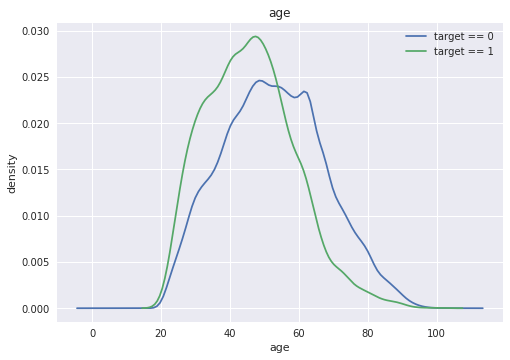

In [265]:
col_ana = 'age'
sns.kdeplot(train.loc[train[col_label] == 0, col_ana], label = 'target == 0')
sns.kdeplot(pd.Series(int(1) * list(train.loc[train[col_label] == 1, col_ana])), label = 'target == 1')
plt.xlabel(col_ana)
plt.ylabel('density')
plt.title(col_ana)
plt.show()

In [106]:
train['age'].describe()

count    150000.000000
mean         52.295207
std          14.771866
min           0.000000
25%          41.000000
50%          52.000000
75%          63.000000
max         109.000000
Name: age, dtype: float64

In [38]:
train_fea['age_less_52'] = train['age'].apply(lambda x: 1 if x <= 52 else 0)
test_fea['age_less_52'] = test['age'].apply(lambda x: 1 if x <= 52 else 0)

In [40]:
# ##############################################
# ### CV avergae result ###
# cur time = 2018/11/13 19:59:26
# train auc = 0.8777210819505399
# valid auc = 0.8667551354583244
# ##############################################
# bagging whole valid auc = 0.8667054104325682

meta_train, meta_test = cv_lgb(pd.concat([train_fea, train[col_fea]], axis = 1),
                               pd.concat([test_fea, test[col_fea]], axis = 1),
                                         train[col_label], 1, 5)


################################################## seed = 0
cur time = 2018/11/19 17:01:29
========================= seed = 0
current whole valid auc = 0.8665138449766701
bagging whole valid auc = 0.8665138449766701
('best_iteration', [403, 706, 726, 733, 762], 666.0)
('train', array([0.87406655, 0.87761815, 0.87877753, 0.87930062, 0.87889961]), 0.8777324920827245)
('valid', array([0.86471389, 0.86982395, 0.8651186 , 0.86509144, 0.86852859]), 0.8666552933065214)

##############################################
### CV avergae result ###
cur time = 2018/11/19 17:02:20
train auc = 0.8777324920827245
valid auc = 0.8666552933065214
##############################################
bagging whole valid auc = 0.8665138449766701


In [342]:
train_age = pd.cut(train['age'], 5).to_frame()

In [343]:
train_age[col_label] = train[col_label]

In [344]:
age_group1 = train_age.groupby('age')[col_label].agg({'cnt_1':np.sum})

In [345]:
age_group2 = train_age.groupby('age')[col_label].agg({'cnt_all':'count'})

In [379]:
age_group = (age_group1['cnt_1'] / age_group2['cnt_all']).reset_index()
age_group.columns = ['age','ratio_1']

In [ ]:
train_age[['age','ratio_1']] = train_age[['age']].merge(age_group, on = 'age')

In [392]:
def age_map(x):
    for i, age in enumerate(age_group['age']):
        if x in age:
            return age_group['ratio_1'][i]
    return -1

train_fea['ratio_1'] = train['age'].apply(age_map)
test_fea['ratio_1'] = test['age'].apply(age_map)

In [393]:
# ##############################################
# ### CV avergae result ###
# cur time = 2018/11/13 19:59:26
# train auc = 0.8777210819505399
# valid auc = 0.8667551354583244
# ##############################################
# bagging whole valid auc = 0.8667054104325682
meta_train, meta_test = cv_lgb(pd.concat([train_fea, train[col_fea]], axis = 1),
                               pd.concat([test_fea, test[col_fea]], axis = 1),
                                         train[col_label], 1, 5)


################################################## seed = 0
cur time = 2018/11/14 16:55:14
========================= seed = 0
current whole valid auc = 0.8667967905732092
bagging whole valid auc = 0.8667967905732092
('best_iteration', [587, 706, 543, 672, 605], 622.6)
('train', array([0.87720394, 0.87791485, 0.87685365, 0.87881601, 0.87682322]), 0.8775223352581172)
('valid', array([0.86522528, 0.86980268, 0.86529758, 0.86525433, 0.86862914]), 0.8668418028678184)

##############################################
### CV avergae result ###
cur time = 2018/11/14 16:56:02
train auc = 0.8775223352581172
valid auc = 0.8668418028678184
##############################################
bagging whole valid auc = 0.8667967905732092


# MonthlyIncome

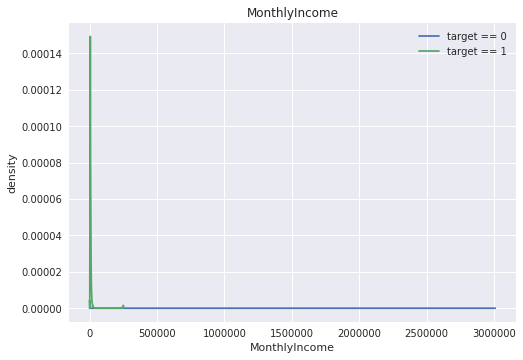

In [121]:
col_ana = 'MonthlyIncome'
sns.kdeplot(train.loc[train[col_label] == 0, col_ana], label = 'target == 0')
sns.kdeplot(pd.Series(int(1) * list(train.loc[train[col_label] == 1, col_ana])), label = 'target == 1')
plt.xlabel(col_ana)
plt.ylabel('density')
plt.title(col_ana)
plt.show()

In [126]:
train['MonthlyIncome'].value_counts()

5000.0     2757
4000.0     2106
6000.0     1934
3000.0     1758
0.0        1634
2500.0     1551
10000.0    1466
3500.0     1360
4500.0     1226
7000.0     1223
8000.0     1127
2000.0     1116
7500.0     1051
10500.0    1013
5500.0      897
6500.0      841
9000.0      763
1.0         605
3200.0      584
6250.0      570
4200.0      569
4166.0      554
1500.0      553
12000.0     547
8333.0      543
8500.0      505
3750.0      504
3600.0      503
2400.0      501
12500.0     499
           ... 
6896.0        1
3057.0        1
20283.0       1
16254.0       1
727.0         1
8405.0        1
28430.0       1
8852.0        1
7462.0        1
10224.0       1
40388.0       1
15667.0       1
6899.0        1
10099.0       1
30500.0       1
10101.0       1
25808.0       1
14803.0       1
9329.0        1
14214.0       1
16582.0       1
10105.0       1
11637.0       1
595.0         1
16580.0       1
3847.0        1
10113.0       1
14210.0       1
13023.0       1
1037.0        1
Name: MonthlyIncome, Len

In [127]:
train['MonthlyIncome'].isnull().sum()

29731

In [137]:
idx_not_zero_MonthlyIncome = ~train['MonthlyIncome'].isnull()
idx_not_zero_MonthlyIncome

0          True
1          True
2          True
3          True
4          True
5          True
6         False
7          True
8         False
9          True
10         True
11         True
12         True
13         True
14         True
15         True
16        False
17         True
18         True
19         True
20         True
21         True
22         True
23         True
24         True
25         True
26         True
27         True
28         True
29         True
          ...  
149970     True
149971     True
149972     True
149973     True
149974     True
149975    False
149976    False
149977    False
149978     True
149979     True
149980     True
149981     True
149982     True
149983     True
149984    False
149985     True
149986     True
149987     True
149988     True
149989     True
149990     True
149991     True
149992    False
149993     True
149994     True
149995     True
149996     True
149997    False
149998     True
149999     True
Name: MonthlyIncome, Len

In [140]:
train[].shape

(150000, 12)

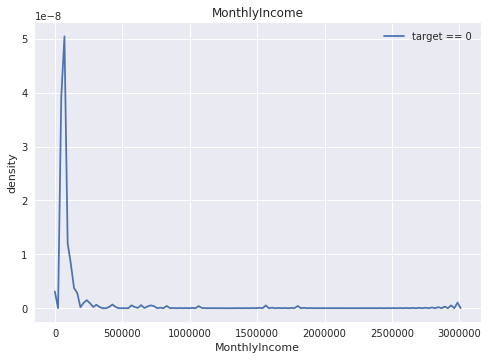

In [146]:
col_ana = 'MonthlyIncome'
sns.kdeplot(train.loc[train[col_label] == 0, col_ana][idx_not_zero_MonthlyIncome], label = 'target == 0')
#sns.kdeplot(train.loc[train[col_label] == 1, col_ana][idx_not_zero_MonthlyIncome], label = 'target == 1')
plt.xlabel(col_ana)
plt.ylabel('density')
plt.title(col_ana)
plt.show()

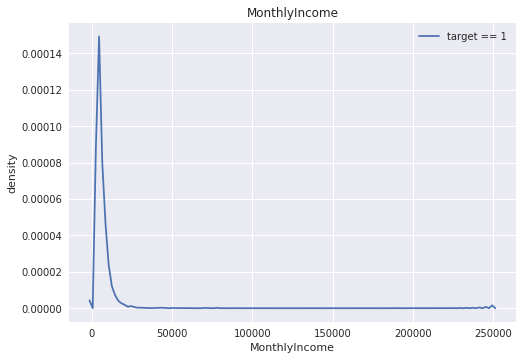

In [147]:
col_ana = 'MonthlyIncome'
#sns.kdeplot(train.loc[train[col_label] == 0, col_ana][idx_not_zero_MonthlyIncome], label = 'target == 0')
sns.kdeplot(train.loc[train[col_label] == 1, col_ana][idx_not_zero_MonthlyIncome], label = 'target == 1')
plt.xlabel(col_ana)
plt.ylabel('density')
plt.title(col_ana)
plt.show()

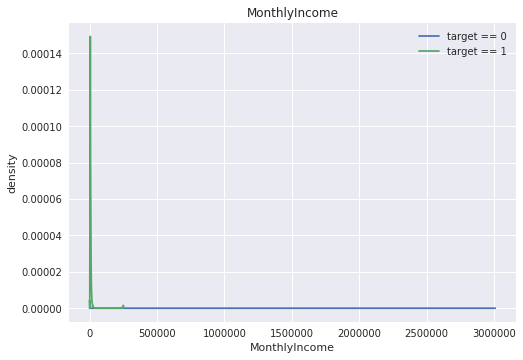

In [148]:
col_ana = 'MonthlyIncome'
sns.kdeplot(train.loc[train[col_label] == 0, col_ana][idx_not_zero_MonthlyIncome], label = 'target == 0')
sns.kdeplot(train.loc[train[col_label] == 1, col_ana][idx_not_zero_MonthlyIncome], label = 'target == 1')
plt.xlabel(col_ana)
plt.ylabel('density')
plt.title(col_ana)
plt.show()

In [154]:
train.loc[train[col_label] == 0, col_ana][idx_not_zero_MonthlyIncome].describe()

count    1.119120e+05
mean     6.747838e+03
std      1.481350e+04
min      0.000000e+00
25%      3.461000e+03
50%      5.466000e+03
75%      8.333000e+03
max      3.008750e+06
Name: MonthlyIncome, dtype: float64

In [155]:
train.loc[train[col_label] == 1, col_ana][idx_not_zero_MonthlyIncome].describe()

count      8357.000000
mean       5630.826493
std        6171.719674
min           0.000000
25%        2963.000000
50%        4500.000000
75%        6800.000000
max      250000.000000
Name: MonthlyIncome, dtype: float64

In [151]:
train_fea['MonthlyIncome_less_25000'] = train['MonthlyIncome'].apply(lambda x: 1 if x <= 25000 else 0)
test_fea['MonthlyIncome_less_25000'] = test['MonthlyIncome'].apply(lambda x: 1 if x <= 25000 else 0)

In [152]:
# baseline
# ##############################################
# ### CV avergae result ###
# cur time = 2018/11/13 19:59:26
# train auc = 0.8777210819505399
# valid auc = 0.8667551354583244
# ##############################################
# bagging whole valid auc = 0.8667054104325682


# add age
# ##############################################
# ### CV avergae result ###
# cur time = 2018/11/13 20:33:31
# train auc = 0.876900927181147
# valid auc = 0.8668217981397964
# ##############################################
# bagging whole valid auc = 0.8667888971264337
meta_train, meta_test = cv_lgb(pd.concat([train_fea, train[col_fea]], axis = 1),
                               pd.concat([test_fea, test[col_fea]], axis = 1),
                                         train[col_label], 1, 5)


################################################## seed = 0
cur time = 2018/11/13 20:48:51
========================= seed = 0
current whole valid auc = 0.8667100720375156
bagging whole valid auc = 0.8667100720375156
('best_iteration', [575, 661, 623, 668, 604], 626.2)
('train', array([0.87753768, 0.87762124, 0.87827375, 0.87911564, 0.87714156]), 0.8779379747562057)
('valid', array([0.86533087, 0.8698014 , 0.86518805, 0.8650704 , 0.86840074]), 0.8667582916464518)

##############################################
### CV avergae result ###
cur time = 2018/11/13 20:49:37
train auc = 0.8779379747562057
valid auc = 0.8667582916464518
##############################################
bagging whole valid auc = 0.8667100720375156


# DebtRatio

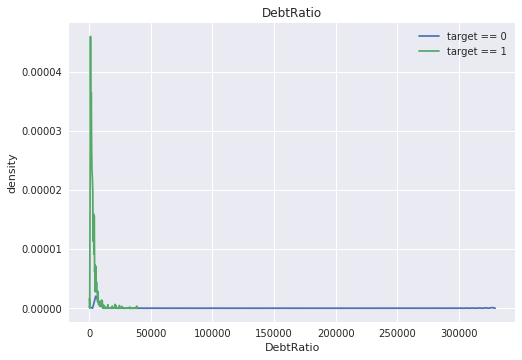

In [171]:
col_ana = 'DebtRatio'
sns.kdeplot(train.loc[train[col_label] == 0, col_ana], label = 'target == 0')
sns.kdeplot(pd.Series(int(1) * list(train.loc[train[col_label] == 1, col_ana])), label = 'target == 1')
plt.xlabel(col_ana)
plt.ylabel('density')
plt.title(col_ana)
plt.show()

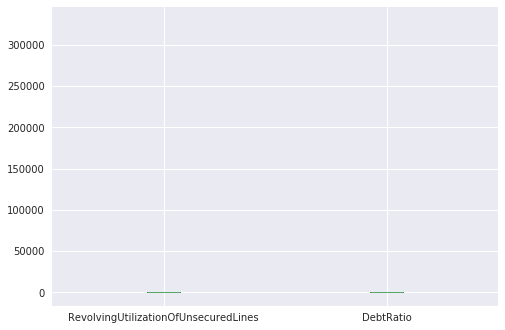

In [184]:
x1=train["RevolvingUtilizationOfUnsecuredLines"]
x2=train["DebtRatio"]
fig=plt.figure(1)
ax=fig.add_subplot(111)
ax.boxplot([x1,x2])
ax.set_xticklabels(["RevolvingUtilizationOfUnsecuredLines","DebtRatio"])
plt.show()

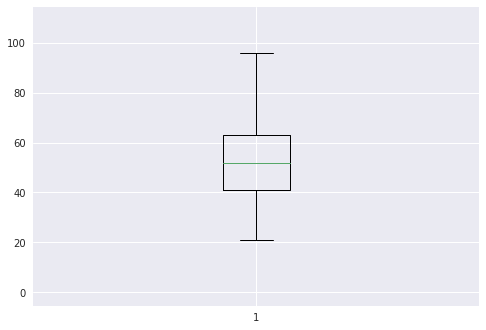

In [201]:
col_ana = 'age'
plt.boxplot(train[col_ana],meanline=True, showfliers = True)
plt.show()


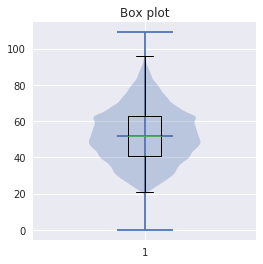

In [222]:
# col_ana = 'age'
# plt.violinplot(train[col_ana], showmeans=False, showmedians=True)
# plt.show()

col_ana = 'age'
fig = plt.figure(figsize=(4,4))
plt.boxplot(train[col_ana])
plt.violinplot(train[col_ana], showmeans=False, showmedians=True)
plt.title('Box plot')
plt.show()

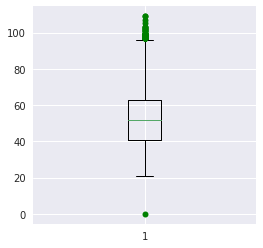

In [242]:
col_ana = 'age'
fig = plt.figure(figsize=(4,4))
plt.boxplot(train[col_ana], sym='go')
plt.show()

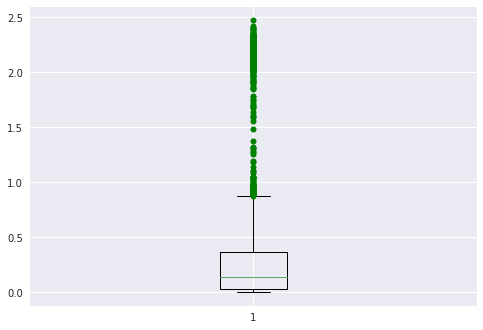

In [245]:
col_ana = 'RevolvingUtilizationOfUnsecuredLines'
plt.boxplot(np.log1p(np.log1p(train[col_ana])),meanline=True, sym = 'go')
plt.show()

In [249]:
col_ana1 = 'NumberOfTime30-59DaysPastDueNotWorse'
col_ana2 = 'NumberOfTime60-89DaysPastDueNotWorse'
col_ana3 = 'NumberOfTimes90DaysLate'

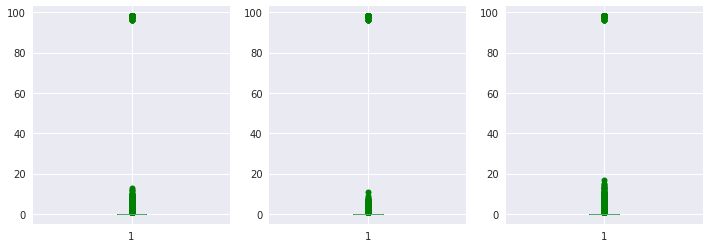

In [260]:
fig = plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.boxplot(train[col_ana1],meanline=True, sym = 'go')

plt.subplot(1,3,2)
plt.boxplot(train[col_ana2],meanline=True, sym = 'go')

plt.subplot(1,3,3)
plt.boxplot(train[col_ana3],meanline=True, sym = 'go')
plt.show()

# NumberOfTimes90DaysLate

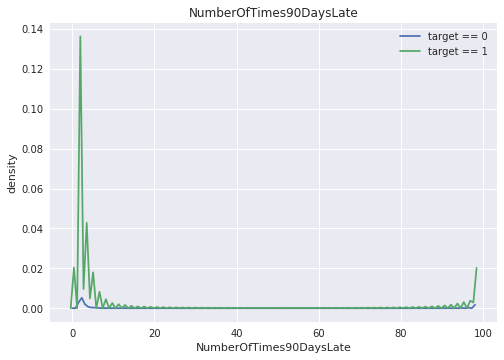

In [166]:
col_ana = 'NumberOfTimes90DaysLate'
sns.kdeplot(train.loc[train[col_label] == 0, col_ana], label = 'target == 0')
sns.kdeplot(pd.Series(int(1) * list(train.loc[train[col_label] == 1, col_ana])), label = 'target == 1')
plt.xlabel(col_ana)
plt.ylabel('density')
plt.title(col_ana)
plt.show()

# end of EDA

# baseline model

In [28]:
col_id = 'Id'
col_label = 'Probability'
col_fea = [col for col in train.columns if col not in [col_id, col_label]]

# bagging cv lgb

In [85]:
# best

In [59]:
meta_train, meta_test = cv_lgb(train[col_fea], test[col_fea], train[col_label], 10, 5)


################################################## seed = 0
cur time = 2018/11/13 17:43:26
========================= seed = 0
current whole valid auc = 0.8657359323472548
bagging whole valid auc = 0.8657359323472548
('best_iteration', [261, 145, 137, 237, 217], 199.4)
('train', array([0.89780202, 0.88374393, 0.88373328, 0.89444568, 0.89145291]), 0.8902355625568568)
('valid', array([0.8644881 , 0.86830905, 0.86391065, 0.86459549, 0.8679837 ]), 0.8658573978087439)

################################################## seed = 1
cur time = 2018/11/13 17:43:41
========================= seed = 1
current whole valid auc = 0.865770130870191
bagging whole valid auc = 0.8663650413022616
('best_iteration', [242, 140, 242, 115, 201], 188.0)
('train', array([0.89470877, 0.88403458, 0.89311251, 0.87914919, 0.89222965]), 0.8886469410468489)
('valid', array([0.86678813, 0.86360099, 0.87065722, 0.86811888, 0.86096857]), 0.8660267584590293)

################################################## seed = 2
cur 

In [60]:
result = pd.DataFrame({col_id:test[col_id], col_label:meta_test})[[col_id, col_label]]
result.to_csv(path + '/result/baseline_lgb.csv', index = False)

# bagging cv lgb + hypteropt

In [86]:
meta_train, meta_test = cv_lgb(train[col_fea], test[col_fea], train[col_label], 10, 5)


################################################## seed = 0
cur time = 2018/11/13 20:04:22
========================= seed = 0
current whole valid auc = 0.8667054104325682
bagging whole valid auc = 0.8667054104325682
('best_iteration', [651, 603, 541, 678, 505], 595.6)
('train', array([0.87877802, 0.87714879, 0.87721292, 0.87942704, 0.87603864]), 0.8777210819505399)
('valid', array([0.86524562, 0.8697685 , 0.86519924, 0.86524657, 0.86831575]), 0.8667551354583244)

################################################## seed = 1
cur time = 2018/11/13 20:05:02
========================= seed = 1
current whole valid auc = 0.8663318913197839
bagging whole valid auc = 0.8667889662453085
('best_iteration', [614, 532, 668, 369, 747], 586.0)
('train', array([0.8779158 , 0.87703925, 0.87793102, 0.8733054 , 0.88087915]), 0.8774141249007709)
('valid', array([0.86696038, 0.86485143, 0.87090579, 0.86845029, 0.86165802]), 0.8665651822168021)

################################################## seed = 2
cur

In [87]:
result = pd.DataFrame({col_id:test[col_id], col_label:meta_test})[[col_id, col_label]]
result.to_csv(path + '/result/baseline_lgb_hyperopt.csv', index = False)

# single lgb

In [84]:
# 跟bagging差不多

In [61]:
meta_train, meta_test = cv_lgb(train[col_fea], test[col_fea], train[col_label], 1, 5)


################################################## seed = 0
cur time = 2018/11/13 17:49:39
========================= seed = 0
current whole valid auc = 0.8657359323472548
bagging whole valid auc = 0.8657359323472548
('best_iteration', [261, 145, 137, 237, 217], 199.4)
('train', array([0.89780202, 0.88374393, 0.88373328, 0.89444568, 0.89145291]), 0.8902355625568568)
('valid', array([0.8644881 , 0.86830905, 0.86391065, 0.86459549, 0.8679837 ]), 0.8658573978087439)

##############################################
### CV avergae result ###
cur time = 2018/11/13 17:49:54
train auc = 0.8902355625568568
valid auc = 0.8658573978087439
##############################################
bagging whole valid auc = 0.8657359323472548


In [62]:
result = pd.DataFrame({col_id:test[col_id], col_label:meta_test})[[col_id, col_label]]
result.to_csv(path + '/result/baseline_lgb_single.csv', index = False)

# after hypreopt

In [83]:
# 线上结果，没什么用

In [81]:
# 0.8667
meta_train, meta_test = cv_lgb(train[col_fea], test[col_fea], train[col_label], 1, 5)


################################################## seed = 0
cur time = 2018/11/13 19:58:45
========================= seed = 0
current whole valid auc = 0.8667054104325682
bagging whole valid auc = 0.8667054104325682
('best_iteration', [651, 603, 541, 678, 505], 595.6)
('train', array([0.87877802, 0.87714879, 0.87721292, 0.87942704, 0.87603864]), 0.8777210819505399)
('valid', array([0.86524562, 0.8697685 , 0.86519924, 0.86524657, 0.86831575]), 0.8667551354583244)

##############################################
### CV avergae result ###
cur time = 2018/11/13 19:59:26
train auc = 0.8777210819505399
valid auc = 0.8667551354583244
##############################################
bagging whole valid auc = 0.8667054104325682


In [82]:
result = pd.DataFrame({col_id:test[col_id], col_label:meta_test})[[col_id, col_label]]
result.to_csv(path + '/result/baseline_lgb_single_hyperopt.csv', index = False)

# bagging cv lgb

In [861]:
#################
# StratifiedKFold, bagging
def cv_lgb(train_feature, test_feature, train_label, n_seed, n_kfold):
    col_fea = [col for col in train_feature.columns if col != 'auto_id']
    train_feature = train_feature[col_fea]
    test_feature = test_feature[col_fea]
    
    bagging_best_it = []
    bagging_score_list = []
    bagging_meta_train = np.zeros(len(train_feature))
    bagging_meta_test = np.zeros(len(test_feature))

    seed_list = range(n_seed)
    n_seed = len(seed_list)
    n_kfold = 5
    for si, seed in enumerate(seed_list):
        print('\n################################################## seed = ' + str(seed))
        print('cur time = ' + str(datetime.datetime.now().strftime("%Y/%m/%d %H:%M:%S")))
        best_it = []
        score_list = []
        meta_train = np.zeros(len(train_feature))
        meta_test = np.zeros(len(test_feature))
        
        skf = StratifiedKFold(train_label, n_folds=n_kfold, shuffle=True, random_state=seed)
        for i,(train_idx,valid_idx) in enumerate(skf):
            #print('\n ##FOLD: ' + str(i))
            #print(len(train_idx), len(valid_idx))
            #print('cur time = ' + str(datetime.datetime.now().strftime("%Y/%m/%d %H:%M:%S")))

            ###########################
            if type(train_feature) == pd.DataFrame:
                X_train, y_train = train_feature.iloc[train_idx], train_label.iloc[train_idx]
                X_valid, y_valid = train_feature.iloc[valid_idx], train_label.iloc[valid_idx]
                X_test = test_feature
            elif type(train_feature) == np.ndarray:
                X_train, y_train = train_feature[train_idx], train_label[train_idx]
                X_valid, y_valid = train_feature[valid_idx], train_label[valid_idx]
                X_test = test_feature
            else:
                print('type error')
            ###########################

            dtrain = lgb.Dataset(X_train, y_train) 
            dvalid = lgb.Dataset(X_valid, y_valid, reference = dtrain)   
            params = {
                'task':'train', 
                'objective': 'binary',
                'metric': 'auc', 

                'boosting_type':'gbdt',
                'num_leaves': 31,
                'learning_rate': 0.05,
                'feature_fraction': 0.85,
                'subsample':0.85,
                'num_threads': 15,
                'seed': seed,
                'max_bin':127,
    #             'reg_alpha': 0.1,
    #             'reg_lambda': 0.1
            }   
            
#             # search by hyperopt
#             params = {
#                 'task':'train', 
#                 'objective': 'binary',
#                 'metric': 'auc', 
#                 'seed': seed,
                
#                 'bagging_fraction': 0.6000000000000001,
#                 'bagging_freq': 11,
#                 'feature_fraction': 0.6000000000000001,
#                 'learning_rate': 0.01988104996565911,
#                 'max_depth': -1,
#                 'min_child_weight': 2.5120929578920372,
#                 'num_leaves': 130,
#                 'reg_alpha': 12.965963834103677,
#                 'reg_lambda': 11.05028207412947
#             }

            # use 3th feature
            params = {
                'task':'train', 
                'objective': 'binary',
                'metric': 'auc', 
                'seed': seed,
                'n_jobs' : 15,
                
                'bagging_fraction': 0.7000000000000001,
                'bagging_freq': 11,
                'feature_fraction': 0.8,
                'learning_rate': 0.04349612990923269,
                'max_depth': -1,
                'min_child_weight': 0.5575853047609016,
                'num_leaves': 21,
                'reg_alpha': 29.847948107182233,
                'reg_lambda': 10.29487867938731
            }
            
            params['n_jobs'] = 31
            model = lgb.train(params, 
                              dtrain, 
                              num_boost_round=3000,
                              valid_sets=[dtrain,dvalid],
                              verbose_eval=0, 
                              early_stopping_rounds=100)  

            best_it.append(model.best_iteration)
            score_list.append(model.best_score)
            
            pred_valid = model.predict(X_valid, model.best_iteration)
            pred_test = model.predict(X_test, model.best_iteration)
            meta_train[valid_idx] += pred_valid
            meta_test += pred_test
            gc.collect()
            #print('cur time = ' + str(datetime.datetime.now().strftime("%Y/%m/%d %H:%M:%S")))
        
        gc.collect()
        bagging_best_it += best_it
        bagging_score_list += score_list
        bagging_meta_train += meta_train
        bagging_meta_test += (meta_test / n_kfold)
        
        print('========================= seed = ' + str(seed))
        print("current whole valid auc = " + str(roc_auc_score(train_label, meta_train)))
        print("bagging whole valid auc = " + str(roc_auc_score(train_label, bagging_meta_train / (1.0 * (si + 1)))))
        print('best_iteration',best_it, np.mean(best_it))
        train_auc = np.array([i['training']['auc'] for i in score_list])
        valid_auc = np.array([i['valid_1']['auc'] for i in score_list])
        print('train', train_auc, np.mean(train_auc))
        print('valid', valid_auc, np.mean(valid_auc))
    
    
    # really bagging
    bagging_meta_train /= (1.0 * n_seed)
    bagging_meta_test /= (1.0 * n_seed)
    
    # average
    train_auc = np.array([i['training']['auc'] for i in bagging_score_list])
    valid_auc = np.array([i['valid_1']['auc'] for i in bagging_score_list])
    print('\n##############################################')
    print('### CV avergae result ###')
    print('cur time = ' + str(datetime.datetime.now().strftime("%Y/%m/%d %H:%M:%S")))
    print('train auc = ' + str(train_auc.mean()))
    print('valid auc = ' + str(valid_auc.mean()))
    print('##############################################')
    print("bagging whole valid auc = " + str(roc_auc_score(train_label, bagging_meta_train / (1.0 * (si + 1)))))
   
    gc.collect()
    return bagging_meta_train, bagging_meta_test
    


In [881]:
############################## lgb ##############################
def train_lgb(X_train, y_train, X_valid, y_valid):
    dtrain = lgb.Dataset(X_train, label = y_train)
    dvalid = lgb.Dataset(X_valid, label = y_valid)

    params = {
        'task':'train', 
        'objective': 'binary',
        'metric': 'auc', 

        'boosting_type':'gbdt',
        'num_leaves': 31,
        'learning_rate': 0.05,
        'feature_fraction': 0.85,
        'subsample':0.85,
        'num_threads': 15,
        'seed': 1,
        'max_bin':127,
        #'reg_alpha': 0.1,
        #'reg_lambda': 0.1
    }   
    
                # search by hyperopt
    params = {
        'task':'train', 
        'objective': 'binary',
        'metric': 'auc', 
        'seed': 1,

        'bagging_fraction': 0.6000000000000001,
        'bagging_freq': 11,
        'feature_fraction': 0.6000000000000001,
        'learning_rate': 0.01988104996565911,
        'max_depth': -1,
        'min_child_weight': 2.5120929578920372,
        'num_leaves': 130,
        'reg_alpha': 12.965963834103677,
        'reg_lambda': 11.05028207412947,
        'is_unbalance': True
    }
    model = lgb.train(params, dtrain, 3000, [dtrain, dvalid],
                early_stopping_rounds=100, verbose_eval = 0)
    score_train = roc_auc_score(y_train, model.predict(X_train))
    score_valid = roc_auc_score(y_valid, model.predict(X_valid))
    return model, score_train, score_valid

def predict_lgb(model, X_test):
    y_test_pred = model.predict(X_test)
    return y_test_pred
    
    
############################## rf ##############################
def train_rf(X_train, y_train, X_valid, y_valid):
    model = RandomForestClassifier()
#     params = {'bootstrap': True,
#         'criterion': 'gini',
#         'max_depth': 12,
#         'max_features': 'auto',
#         'max_leaf_nodes': None,
#         'min_impurity_decrease': 0.0,
#         'min_impurity_split': None,
#         'min_samples_leaf': 10,
#         'min_samples_split': 2,
#         'min_weight_fraction_leaf': 0.0,
#         'n_estimators': 1000,
#         #'n_jobs': -1,
#         'n_jobs': 15,
#         'oob_score': False,
#         'random_state': 42,
#         'verbose': 0,
#         'warm_start': False,
#         #'class_weight':{0:13, 1:1}
#     }
    params = {
        'n_estimators': 1155,
        'max_depth': 14,
        'class_weight': {0: 50, 1: 50},
        'n_jobs': 31
    }
    model.set_params(**params)
    model.fit(X_train, y_train)
    score_train = roc_auc_score(y_train, model.predict_proba(X_train)[:,1])
    score_valid = roc_auc_score(y_valid, model.predict_proba(X_valid)[:,1])
    return model, score_train, score_valid

def predict_rf(model, X_test):
    y_test_pred = model.predict_proba(X_test)[:,1]
    return y_test_pred    

############################## erf ##############################
def train_erf(X_train, y_train, X_valid, y_valid):
    model = ExtraTreesClassifier()
    params = {
        'n_estimators':1000,
        'max_depth':12,
        'min_samples_split':2,
        'random_state':1,
        'n_jobs': 15
    }
    model.set_params(**params)
    model.fit(X_train, y_train)
    score_train = roc_auc_score(y_train, model.predict_proba(X_train)[:,1])
    score_valid = roc_auc_score(y_valid, model.predict_proba(X_valid)[:,1])
    return model, score_train, score_valid

def predict_erf(model, X_test):
    y_test_pred = model.predict_proba(X_test)[:,1]
    return y_test_pred    


    

    
############################## cv ##############################
def simple_cv(model_name, X, y, X_test, k = 5):
    print('######################################################## begin')
    print('####### cur time = ' + str(datetime.datetime.now().strftime("%Y/%m/%d %H:%M:%S")))
      
    model_list = [] 
    socre_train_list = []
    score_valid_list = []
    y_test_pred_list = []
    for i in range(k):
        X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2, random_state = i + 1)

        if model_name == 'lgb':
            model, socre_train, score_valid = train_lgb(X_train, y_train, X_valid, y_valid) 
            y_test_pred = predict_lgb(model, X_test)
        elif model_name == 'rf':
            model, socre_train, score_valid = train_rf(X_train, y_train, X_valid, y_valid) 
            y_test_pred = predict_rf(model, X_test)
        elif model_name == 'erf':
            model, socre_train, score_valid = train_erf(X_train, y_train, X_valid, y_valid) 
            y_test_pred = predict_erf(model, X_test)
            
        # result
        model_list.append(model)
        socre_train_list.append(np.round(socre_train, 6))
        score_valid_list.append(np.round(score_valid, 6))
        y_test_pred_list.append(y_test_pred)
        
    print('train score = ', socre_train_list, np.mean(socre_train_list))
    print('valid score = ', score_valid_list, np.mean(score_valid_list))
    
    print('########################################################## end')
    print('####### cur time = ' + str(datetime.datetime.now().strftime("%Y/%m/%d %H:%M:%S")))
    return np.mean(y_test_pred_list, axis = 0)

In [193]:
y_test_pred = simple_cv('lgb', train[col_fea], train[col_label], test[col_fea], k = 5)

######################################################## begin
####### cur time = 2018/11/20 20:14:59
('train score = ', [0.875227, 0.875761, 0.881381, 0.874191, 0.875393], 0.8763906)
('valid score = ', [0.866012, 0.864783, 0.863528, 0.866049, 0.867813], 0.8656369999999999)
########################################################## end
####### cur time = 2018/11/20 20:15:38


In [190]:
train2 = train.copy()
train2.fillna(train2.mean(), inplace= True)
test2 = test.copy()
test2.fillna(test2.mean(), inplace= True)

y_test_pred2 = simple_cv('rf', train2[col_fea], train2[col_label], test2[col_fea], k = 5)

######################################################## begin
####### cur time = 2018/11/20 20:12:35
('train score = ', [0.902534, 0.901578, 0.90323, 0.902285, 0.90215], 0.9023553999999999)
('valid score = ', [0.865705, 0.863297, 0.861969, 0.865857, 0.866118], 0.8645892)
########################################################## end
####### cur time = 2018/11/20 20:14:09


In [882]:
y_test_pred_rf_2 = simple_cv('rf', X2, train[col_label], X, k = 5)

######################################################## begin
####### cur time = 2018/11/21 17:40:24
('train score = ', [0.946517, 0.947355, 0.948985, 0.945383, 0.947452], 0.9471384)
('valid score = ', [0.865034, 0.863632, 0.862303, 0.865428, 0.865814], 0.8644422)
########################################################## end
####### cur time = 2018/11/21 17:43:15


In [885]:
result = pd.DataFrame({col_id:test[col_id], col_label:y_test_pred_rf_2})
result.to_csv(path + '/result/baseline_rf_3rd_fea_hyperopt.csv', index = False)

In [191]:
train2 = train.copy()
train2.fillna(train2.mean(), inplace= True)
test2 = test.copy()
test2.fillna(test2.mean(), inplace= True)

y_test_pred3 = simple_cv('erf', train2[col_fea], train2[col_label], test2[col_fea], k = 5)

######################################################## begin
####### cur time = 2018/11/20 20:14:09
('train score = ', [0.836728, 0.837205, 0.836805, 0.837421, 0.837133], 0.8370583999999999)
('valid score = ', [0.830408, 0.825152, 0.827262, 0.828297, 0.826663], 0.8275564000000001)
########################################################## end
####### cur time = 2018/11/20 20:14:59


In [210]:
y_test_pred_bagging = np.mean([0.5*3*y_test_pred, 0.4*3*y_test_pred2, 0.1*3*y_test_pred3], axis = 0)

In [211]:
result = pd.DataFrame({col_id:test[col_id], col_label:y_test_pred_bagging})

In [213]:
result.to_csv(path + '/result_lgb_rf_erf.csv', index = False)

# Bayes Hyperparameter Opimatzation

In [75]:
hyperparams, best, trials = hyperopt_lightgbm(train[col_fea],  train[col_label], params, config)

######################################################## begin hyperopt_lightgbm
####### cur time = 2018/11/13 19:52:03
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[464]	valid_0's auc: 0.86924
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[404]	valid_0's auc: 0.8686
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[1707]	valid_0's auc: 0.867528
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[457]	valid_0's auc: 0.869116
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[622]	valid_0's auc: 0.868432
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[579]	valid_0's auc: 0.869106
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[464]	valid_0's 

# hyperopt

In [825]:
import hyperopt
from hyperopt import hp, tpe, STATUS_OK, space_eval, Trials

config = {}
#config['mode'] = 'regression'
config['mode'] = 'classification'
params = {
        "objective": "regression" if config["mode"] == "regression" else "binary",
        "metric": "rmse" if config["mode"] == "regression" else "auc",
        "verbosity": -1,
        "seed": 1,
        "n_jobs":31
}

def merge_dict(d1, d2):
    tmp = d1.copy()
    tmp.update(d2)
    return tmp
def hyperopt_lightgbm(X, y, params, config):
    print('######################################################## begin hyperopt_lightgbm')
    print('####### cur time = ' + str(datetime.datetime.now().strftime("%Y/%m/%d %H:%M:%S")))
    
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=1)
    train_data = lgb.Dataset(X_train, label=y_train)
    valid_data = lgb.Dataset(X_val, label=y_val)

    space = {
        "learning_rate": hp.uniform("learning_rate", 0.01, 0.05),
        "max_depth": hp.choice("max_depth", [-1, 2, 3, 4, 5, 6]),
        "num_leaves": hp.choice("num_leaves", np.linspace(10, 200, 50, dtype=int)),
        "feature_fraction": hp.quniform("feature_fraction", 0.5, 1.0, 0.1),
        "bagging_fraction": hp.quniform("bagging_fraction", 0.5, 1.0, 0.1),
        "bagging_freq": hp.choice("bagging_freq", np.linspace(0, 50, 10, dtype=int)),
        "reg_alpha": hp.uniform("reg_alpha", 0, 30),
        "reg_lambda": hp.uniform("reg_lambda", 0, 30),
        "min_child_weight": hp.uniform('min_child_weight', 0.5, 10),
    }

    def objective(hyperparams):
#         model = lgb.train({**params, **hyperparams}, train_data, 300, valid_data,
#                           early_stopping_rounds=100, verbose_eval=1000)
        model = lgb.train(merge_dict(params, hyperparams), train_data, 3000, valid_data,
                          early_stopping_rounds=100, verbose_eval=-1)

        score = model.best_score["valid_0"][params["metric"]]
        if config['mode'] == 'classification':
            score = -score

        return {'loss': score, 'status': STATUS_OK}

    trials = Trials()
    best = hyperopt.fmin(fn=objective, space=space, trials=trials, algo=tpe.suggest, max_evals=30, verbose=1,
                         rstate=np.random.RandomState(1))

    hyperparams = space_eval(space, best)
    print('########################################################## end hyperopt_lightgbm')
    print('####### cur time = ' + str(datetime.datetime.now().strftime("%Y/%m/%d %H:%M:%S")))
    print("{:0.4f} {}".format(trials.best_trial['result']['loss'], hyperparams))
    return hyperparams, best, trials

In [61]:
hyperparams, best, trials = hyperopt_lightgbm(train[col_fea][:1000],  train[col_label][:1000], params, config)

######################################################## begin hyperopt_lightgbm
####### cur time = 2018/11/20 17:19:23
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[1]	valid_0's auc: 0.696151
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[1]	valid_0's auc: 0.696151
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[1]	valid_0's auc: 0.696151
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[1]	valid_0's auc: 0.696151
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[1]	valid_0's auc: 0.696151
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training

In [86]:
# trials_df = pd.DataFrame(trials.trials)
# trials_df['auc'] = trials_df['result'].apply(lambda x: x['loss'])
# trials_df.sort_values(by = 'auc', inplace = True)

# after add feature

In [826]:
hyperparams, best, trials = hyperopt_lightgbm(X,  train[col_label], params, config)

######################################################## begin hyperopt_lightgbm
####### cur time = 2018/11/21 16:40:12
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[348]	valid_0's auc: 0.86711
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[559]	valid_0's auc: 0.865842
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[1280]	valid_0's auc: 0.866897
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[566]	valid_0's auc: 0.86635
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[815]	valid_0's auc: 0.867114
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[553]	valid_0's auc: 0.867455
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[377]	valid_0's

In [827]:
trials_df = pd.DataFrame(trials.trials)
trials_df['auc'] = trials_df['result'].apply(lambda x: x['loss'])
trials_df.sort_values(by = 'auc', inplace = True)

In [829]:
hyperparams

{'bagging_fraction': 0.7000000000000001,
 'bagging_freq': 11,
 'feature_fraction': 0.8,
 'learning_rate': 0.04349612990923269,
 'max_depth': -1,
 'min_child_weight': 0.5575853047609016,
 'num_leaves': 21,
 'reg_alpha': 29.847948107182233,
 'reg_lambda': 10.29487867938731}

# hyperopt rf

In [869]:
import hyperopt
from hyperopt import hp, tpe, STATUS_OK, space_eval, Trials

config = {}
#config['mode'] = 'regression'
config['mode'] = 'classification'
params = {
        'bootstrap': True,
        'criterion': 'gini',
        'verbose': 0,
        'warm_start': False,
        'random_state': 42,
        'n_jobs': 31,
}


def merge_dict(d1, d2):
    tmp = d1.copy()
    tmp.update(d2)
    return tmp

def hyperopt_rf(X, y, params, config):
    print('######################################################## begin hyperopt_lightgbm')
    print('####### cur time = ' + str(datetime.datetime.now().strftime("%Y/%m/%d %H:%M:%S")))
    
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=1)

    space = {
#         "learning_rate": hp.uniform("learning_rate", 0.01, 0.05),
#         "max_depth": hp.choice("max_depth", [-1, 2, 3, 4, 5, 6]),
#         "num_leaves": hp.choice("num_leaves", np.linspace(10, 200, 50, dtype=int)),
#         "feature_fraction": hp.quniform("feature_fraction", 0.5, 1.0, 0.1),
#         "bagging_fraction": hp.quniform("bagging_fraction", 0.5, 1.0, 0.1),
#         "bagging_freq": hp.choice("bagging_freq", np.linspace(0, 50, 10, dtype=int)),
#         "reg_alpha": hp.uniform("reg_alpha", 0, 30),
#         "reg_lambda": hp.uniform("reg_lambda", 0, 30),
#         "min_child_weight": hp.uniform('min_child_weight', 0.5, 10),
        "max_depth": hp.choice("max_depth", [4, 6, 8, 10, 12,14,16,18]),
        'n_estimators': hp.choice("n_estimators", np.linspace(100, 2000, 10, dtype=int)),
        'class_weight': hp.choice("class_weight", [{0:50, 1:50}, {0:90, 1:10}, {0:13, 1:1}, {0:75, 1:25}])
    }
    

    def objective(hyperparams):    
        model = RandomForestClassifier()
        model.set_params(**merge_dict(params, hyperparams))
        model.fit(X_train, y_train)
        score = roc_auc_score(y_valid, model.predict_proba(X_valid)[:,1])
        if config['mode'] == 'classification':
            score = -score
        return {'loss': score, 'status': STATUS_OK}

    trials = Trials()
    best = hyperopt.fmin(fn=objective, space=space, trials=trials, algo=tpe.suggest, max_evals=30, verbose=1,
                         rstate=np.random.RandomState(1))

    hyperparams = space_eval(space, best)
    print('########################################################## end hyperopt_lightgbm')
    print('####### cur time = ' + str(datetime.datetime.now().strftime("%Y/%m/%d %H:%M:%S")))
    print("{:0.4f} {}".format(trials.best_trial['result']['loss'], hyperparams))
    return hyperparams, best, trials

In [121]:
train2 = train.copy()
train2.fillna(train2.mean(), inplace= True)
hyperparams, best, trials = hyperopt_rf(train2[col_fea],  train2[col_label], params, config)

######################################################## begin hyperopt_lightgbm
####### cur time = 2018/11/20 17:59:38
########################################################## end hyperopt_lightgbm
####### cur time = 2018/11/20 18:04:09
-0.8650 {'n_estimators': 800, 'max_depth': 12}


In [123]:
trials_df = pd.DataFrame(trials.trials)
trials_df['auc'] = trials_df['result'].apply(lambda x: x['loss'])
trials_df = trials_df.sort_values(by = 'auc').reset_index(drop = True)

# after add feature

In [870]:
hyperparams, best, trials = hyperopt_rf(X2,  train[col_label], params, config)

######################################################## begin hyperopt_lightgbm
####### cur time = 2018/11/21 17:16:17
########################################################## end hyperopt_lightgbm
####### cur time = 2018/11/21 17:32:27
-0.8658 {'n_estimators': 1155, 'max_depth': 14, 'class_weight': {0: 50, 1: 50}}
